# NYC 311 Service Request Analysis

##### Import Required libraries.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##### Import 311 NYC service request dataset into Dataframe

In [57]:
dataframe = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [58]:
customer_df = dataframe.copy()

In [59]:
customer_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


- As visible below, many columns has a lot of null values
- The size of the dataframe is around 121 MB

In [60]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

- Make a list of columns which has null values and irrlevate data
- Dropping the listed columns

In [61]:
drop_columns= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

In [62]:
customer_df.drop(columns = drop_columns, inplace= True)

In [63]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency                  300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   Address Type            297883 non-null  object 
 9   City                    298084 non-null  object 
 10  Status                  300698 non-null  object 
 11  Resolution Description  300698 non-null  object 
 12  Borough                 300698 non-null  object 
 13  Latitude                297158 non-null  float64
 14  Longitude           

- Now we could notice the size of dataframe is reduced to around 34 MB

In [64]:
customer_df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


In [65]:
customer_df = customer_df[customer_df['Borough'] != 'Unspecified']

In [66]:
customer_df['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Name: Borough, dtype: int64

In [67]:
customer_df.nunique()

Unique Key                298124
Created Date              257405
Closed Date               236820
Agency                         1
Complaint Type                21
Descriptor                    41
Location Type                 15
Incident Zip                 201
Address Type                   5
City                          53
Status                         4
Resolution Description        14
Borough                        5
Latitude                  125122
Longitude                 125216
dtype: int64

## 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. 

In [68]:
customer_df['Created Date'] = pd.to_datetime(customer_df['Created Date'])
customer_df['Closed Date'] = pd.to_datetime(customer_df['Closed Date'])

In [69]:
customer_df.dropna(subset=['Created Date','Closed Date','City'], inplace=True)

In [70]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298027 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              298027 non-null  int64         
 1   Created Date            298027 non-null  datetime64[ns]
 2   Closed Date             298027 non-null  datetime64[ns]
 3   Agency                  298027 non-null  object        
 4   Complaint Type          298027 non-null  object        
 5   Descriptor              292121 non-null  object        
 6   Location Type           297905 non-null  object        
 7   Incident Zip            298024 non-null  float64       
 8   Address Type            297789 non-null  object        
 9   City                    298027 non-null  object        
 10  Status                  298027 non-null  object        
 11  Resolution Description  298027 non-null  object        
 12  Borough                 298027

In [71]:
customer_df['Request_Closing_Time'] = customer_df['Closed Date'] - customer_df['Created Date']

In [72]:
customer_df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02


## 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

Frequency of Top 5 complaints received

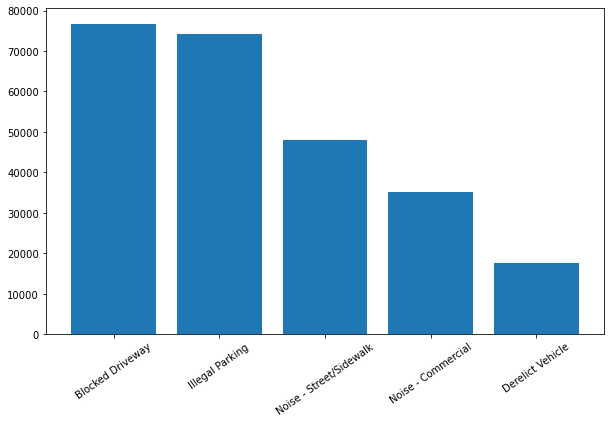

In [73]:
plt.figure(figsize=(10,6))
plt.bar(customer_df['Complaint Type'].value_counts().keys()[:5], customer_df['Complaint Type'].value_counts()[:5])
plt.xticks(rotation = 35)
plt.show()

- As shown above, the highest number of complaint received of 'Blocked Driveway' type, followed by 'Illegal Parking' and 'Noise - Street/Sidewalk'

Lets analyse Top 5 Description of compaints received

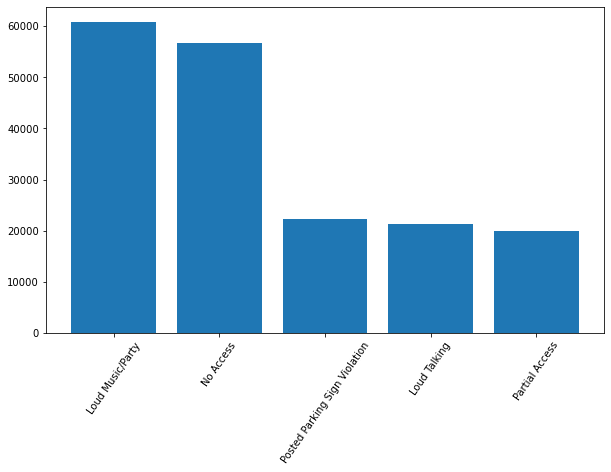

In [74]:
plt.figure(figsize=(10,6))
plt.bar(customer_df['Descriptor'].value_counts()[:5].keys(), customer_df['Descriptor'].value_counts()[:5])
plt.xticks(rotation = 55)
plt.show()

- From the above plot it is clear that 'Blocked Driveway' complaints are received with description 'No Access' followed by 'Posted Parking Sign Violation' and 'Partial Access'.
- 'Loud Music/Party' and 'Loud Talking' are well describes the Noise related complaint types.

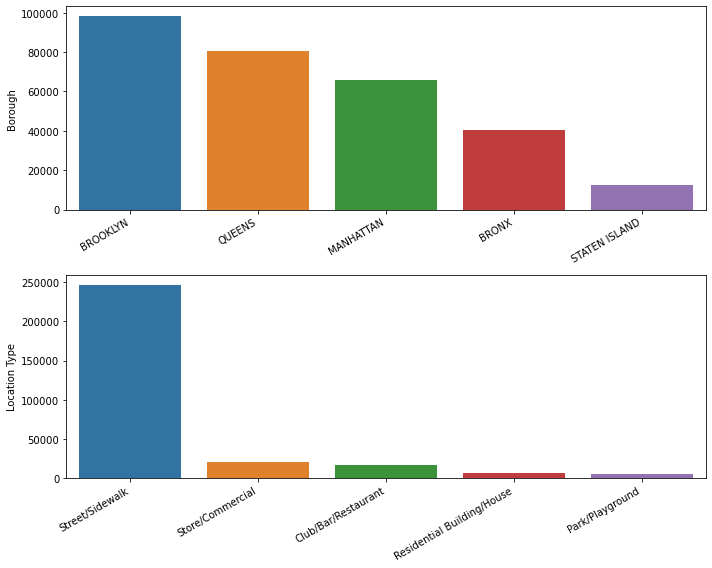

In [75]:
fig, ax = plt.subplots(2, figsize = (10,8))

location = sns.barplot(ax = ax[1], x = customer_df['Location Type'].value_counts()[:5].keys(), y = customer_df['Location Type'].value_counts()[:5])
location.set_xticklabels(location.get_xticklabels(), rotation=30, ha="right")


borough = sns.barplot(ax = ax[0], x = customer_df['Borough'].value_counts()[:5].keys(), y = customer_df['Borough'].value_counts()[:5])
borough.set_xticklabels(borough.get_xticklabels(), rotation=30, ha="right")


plt.tight_layout()

- Brooklyn has the most number of complaints followed by Queens and Manhattan.
- Most of the complaints are arriving on Street/Sidewalk.

In [76]:
complaints_type = ['Blocked Driveway','Illegal Parking','Noise - Commercial','Noise - Street/Sidewalk','Derelict Vehicle','Animal Abuse']
complaints_borough = customer_df.groupby(['Borough','Complaint Type']).size().unstack()
complaints_borough = complaints_borough[complaints_type]

In [77]:
complaints_borough

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Animal Abuse
Borough,,,,,,
BRONX,12754.0,7859.0,2433.0,8889.0,1952.0,1415.0
BROOKLYN,28147.0,27461.0,11458.0,13353.0,5179.0,2394.0
MANHATTAN,2070.0,12127.0,14544.0,20522.0,537.0,1525.0
QUEENS,31639.0,21978.0,6073.0,4406.0,8108.0,1876.0
STATEN ISLAND,2142.0,4886.0,677.0,816.0,1766.0,557.0


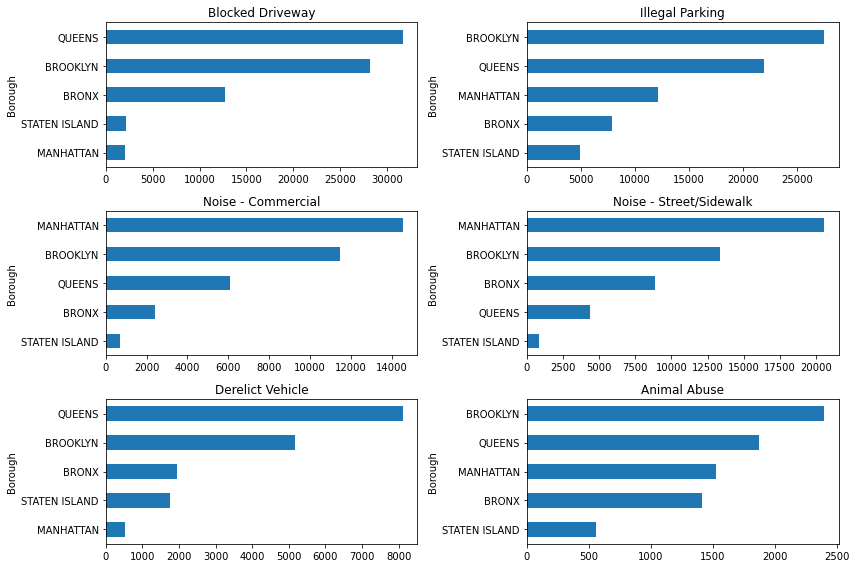

In [78]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(complaints_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Brookyln has highest number complaints of 'Illegal Parking' and 'Animal Abuse'.
- The 'Blocked Driveway' and 'Derelict Vehicle' complaints are mostly recoreded on Queens.
- The plots clearly indicates that most of the noises complaints are coming from Manhattan.
- Staten Island is recording relatively less number of complaints with respect to other boroughs.

In [79]:
customer_df['Request_Closing_Hours'] = customer_df['Request_Closing_Time'].astype('timedelta64[h]')+1
customer_df[['Request_Closing_Time','Request_Closing_Hours']].head()

,Request_Closing_Time,Request_Closing_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0


In [80]:
mean = customer_df['Request_Closing_Hours'].mean()
std = customer_df['Request_Closing_Hours'].std()

print('Mean: ',mean)
print('Std: ',std)

Mean:  4.814724840366813
Std:  6.049486959748234


In [81]:
customer_df['Request_Closing_Hours'].sort_values().tail()

12168     224.0
12167     224.0
21268     520.0
23664     578.0
244488    593.0
Name: Request_Closing_Hours, dtype: float64

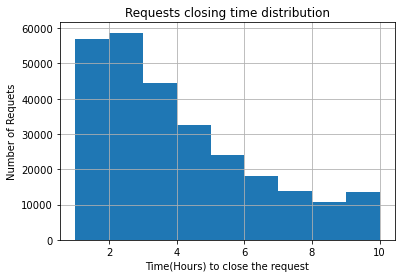

In [82]:
plot_data = customer_df[ ((customer_df['Request_Closing_Hours']-mean)/std) < 1]
plot_data['Request_Closing_Hours'].hist(bins=9)
plt.xlabel('Time(Hours) to close the request')
plt.ylabel('Number of Requets')
plt.title('Requests closing time distribution')
plt.show()

- Most of the complaints are resolved in less than 4 hrs.
- Almost all the complaints get closed within 10 hrs.

## 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

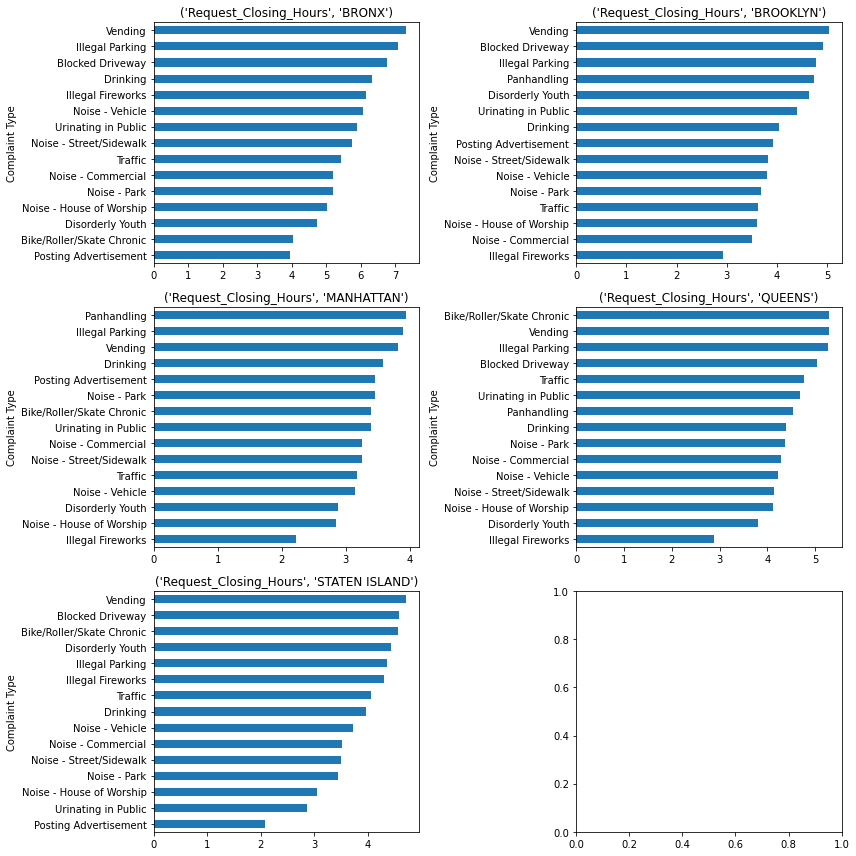

In [83]:
citywise_resolution = customer_df.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(citywise_resolution.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Clearly, Vending complaints are taking long time to resolved.
- Manhattan, Brooklyn and Queens are very good to handle Illegal Fireworks complaints.

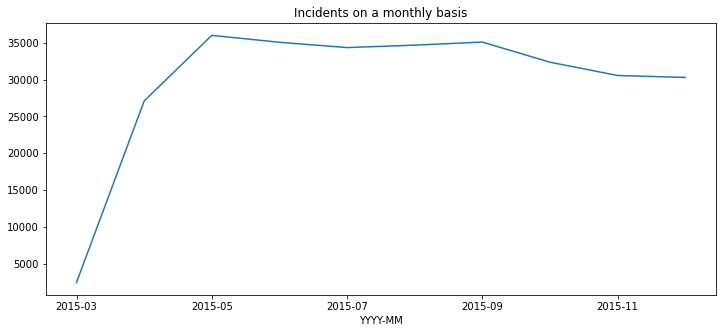

In [84]:
import datetime
customer_df['YYYY-MM'] = customer_df['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

#Incidents on a monthly basis
monthly_incidents =  customer_df.groupby('YYYY-MM').size().plot(figsize=(12,5), title='Incidents on a monthly basis');

- Highest number of complaints are recorded in the month of May and September.
- Least number of complaints are recorded in the month of March.

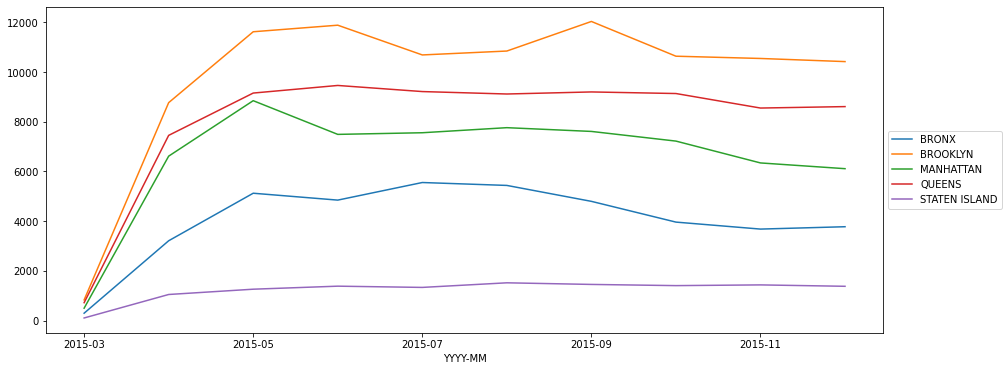

In [85]:
# Complaints per Borough through the year
customer_df.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

# Perform Statistical Test

### 1.  Whether the average response time across complaint types is similar or not (overall)

- First we will convert our hourly timedelta into minuted for more precise results.
- Below is the distribution of our Request_Closing_Minutes data for 'Noise - Street/Sidewalk' complaint type.
- We see a positive skewness in data if we limit the range to 1250
- As our data contains too many outliers , hence we will transform the data using log transformation

<AxesSubplot:>

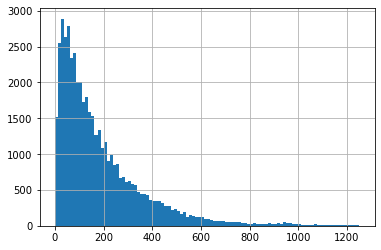

In [86]:
customer_df['Request_Closing_Minutes'] = customer_df['Request_Closing_Time'].astype('timedelta64[m]')+1

cust_df = customer_df[customer_df['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Minutes']
cust_df.hist(bins=100,range=(0,1250))

In [87]:
cust_df.describe()

count    47986.000000
mean       207.016776
std        326.610847
min          3.000000
25%         61.000000
50%        133.000000
75%        259.000000
max      35573.000000
Name: Request_Closing_Minutes, dtype: float64

- When we look at above statistics, it becomes clear that we have very few but very large values after th 75th percentile.

- we will take the log of Request_Closing_Minutes for each complaint type and store in a dictionary.
- Log transformation removes the skewness from the data.

In [88]:
data = {}
for complaint in customer_df['Complaint Type'].unique():
    data[complaint] = np.log(customer_df[customer_df['Complaint Type']==complaint]['Request_Closing_Minutes'])

In [89]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'])

<AxesSubplot:>

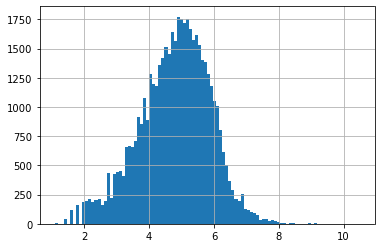

In [90]:
data['Noise - Street/Sidewalk'].hist(bins=100)

<AxesSubplot:>

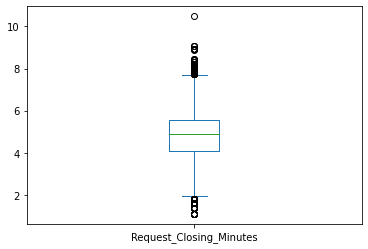

In [91]:
data['Noise - Street/Sidewalk'].plot(kind = 'box')

In [92]:
for complaint in data.keys():
    print(data[complaint].std())

1.088122697901445
0.9689131801038576
1.0669325650218924
1.2472412521336702
1.0740645608715385
1.1578783566404034
1.1940496830014724
1.0640501695025244
1.0353874715070719
1.098828353631681
1.1688314448754398
1.0354309769699395
1.1549910802980003
1.0578811759503506
1.103276477974517
1.02141533267075
1.0896898895618483
1.0581967861803852
1.0276748370244453
1.1905406895067956
0.8469384425802964


-  To conduct our hypothesis test, we will conduct an ANOVA (analysis of variance) test as we have to compare the means of more than two groups.
- Below conditions should be met before conducting ANOVA.
    1. All distributions must follow a normal distributions curve. We have verified this after the log transformation
    2. Standard deviation for all groups must be same. Above output proves that this is true.
    3. All samples are drawn independently of each other.

In [93]:
[ complaint for complaint in data.keys() ]

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Bike/Roller/Skate Chronic',
 'Panhandling',
 'Noise - Park',
 'Homeless Encampment',
 'Urinating in Public',
 'Graffiti',
 'Disorderly Youth',
 'Illegal Fireworks',
 'Squeegee']

Now we will futher move on to defining hypothesis and critical values........

**Null Hypothesis:** Average response time for all the complaints type is same.

**Alternate Hypothesis:** Average response time for all the complaints type is not same and theres is some difference among the groups.

- Below We conduct ANOVA test for top 5 type of complaints
- For a 95% of confidence interval we choose our alpha as 0.05 for 5%
- Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

     **if p < alpha(0.05)** : Reject Null Hypothesis, Average response time for all the complaints type is not same.
     
     **if p > alpha(0.05)** : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [94]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

stat, p = f_oneway(data['Noise - Street/Sidewalk'],data['Blocked Driveway'],data['Illegal Parking'],data['Derelict Vehicle'],
                   data['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2469.077, p=0.000
Different distributions (reject H0)


- As our p-value is quite low , hence it is being converted to 0.0
- Since our p-value is lowere that our critical p-value, we will conclude that we have enogh evidence to reject pur Null Hypothesis and that

     **Average response time for all the complaints type is not same.**

### 2. Are the type of complaint or service requested and location related?

- To find the correlation between location and complaint types, we will consider below columns
    1. Complaint Type
    2. Borough
    3. City
    4. Longitude
    5. Latitude
    

In [95]:
sample = customer_df[['Complaint Type','Borough','Longitude','Latitude','City']]

In [96]:
for col in sample.select_dtypes(include='object'):
    sample[col] = sample[col].astype('category')
    sample[col] = sample[col].cat.codes #not 'category' type anymore.

In [97]:
sample.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,13,2,-73.923501,40.865682,33
1,2,3,-73.915094,40.775945,1
2,2,0,-73.888525,40.870325,6
3,9,0,-73.828379,40.835994,6
4,9,3,-73.874170,40.733060,13


In [98]:
sample.corr(method='pearson')

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.066995,-0.182636,0.154112,0.095865
Borough,-0.066995,1.000000,0.021402,-0.249486,0.717795
Longitude,-0.182636,0.021402,1.000000,0.364964,-0.124040
Latitude,0.154112,-0.249486,0.364964,1.000000,-0.000568
City,0.095865,0.717795,-0.124040,-0.000568,1.000000


- As we can see from above table, **there is no relationship between complaint type and location.**
- Which will be the general idea as in our data, most of the Complaint type are of 'Blocked Driveway' and 'Illegal Parking' which is common in all of the Boroughs.